# Least Squares Regression
* Type of Data: Continuous
* Basic Concept: Minimize distance from all data points by minimizing function: sum((Yi-Ypredictedi)^2) (also known as residual sum of squares, RSS)
* Use case: as a predictive model
  * Continuation of the line of reasoning that first asks if there is a relationship, asks about the strength of the relationship, (James et al, 2013, p. 59-60)

## General Linear Model
* Data = Model + Error
* Error is random, with a mean of zero due to how the model is fitted to the data
* We are trying to approximate the model in the ideal GLM (where the error is truly random)
* Model of form y = mx + b (m is now called Beta1 and b Beta0)
* We are trying to find the true model for the entire population based on the sample we have available
  * The central idea is that as you increase the samples, the sample mean line of best fit will match the true line of best fit
  
## Strengths and weaknesses
+ Strength: The least squares linear model is extremely simple and easy to implement
- Weakness: However, due to this simplicity it often oversimplifies real world problems and makes it easy for rigorous testing of the model to get overlooked

<style> 
div {line-height: 2}
</style>
<div class='bib'>
<center>Resources</center>
Gareth James, Daniela Witten, Trevor Hastie, Robert Tibshirani. (2013). An introduction to statistical learning: with applications in R. New York: Springer

https://github.com/JWarmenhoven/ISLR-python#readmehttps://github.com/JWarmenhoven/ISLR-python#readme

Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.
</div>


b0 7.032593549127698
b1 0.047536640433019736


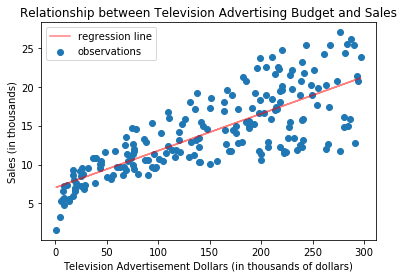

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Minimization of RSS with the variables Beta0 and Beta1
# This can be used by computign the partial derivatives of RSS in terms of Beta0 and then Beta1 in order to find the following formula for Beta0 and Beta1

def b0(x,y,beta1):
    y_mean = sum(y)/len(y)
    x_mean = sum(x)/len(x)
    
    b0 = y_mean - beta1*x_mean  
    return b0

def b1(x,y):
    x = np.array(x)
    y = np.array(y)

    y_mean = np.sum(y)/len(y)
    x_mean = np.sum(x)/len(x)

    b1 = np.sum((x-x_mean)*(y-y_mean))/np.sum(
        (x-x_mean)*(x-x_mean))
    return b1

# Import advertising dataset
# This dataset is used to show the relationship between advertising budget and sales
# This is a dataset of sample means

import pathlib

adv_df = pd.read_csv(pathlib.Path('.\datasets\Advertising.csv'))

b1_ = b1(adv_df.TV.values, adv_df.Sales.values)

b0_ = b0(adv_df.TV.values, adv_df.Sales.values, b1_)

print('b0',b0_)
print('b1',b1_)

X = adv_df.TV.values
Y = adv_df.Sales.values

plt.scatter(X,Y, label = 'observations')
plt.plot(X, X*b1_ + b0_, c = 'r', alpha = .5, label = 'regression line')
plt.title('Relationship between Television Advertising Budget and Sales')
plt.xlabel('Television Advertisement Dollars (in thousands of dollars)')
plt.ylabel('Sales (in thousands)')
plt.legend()
plt.show()

In [3]:
# Evaluating the wether there is indeed a relationship

# Null hypthesis: these is no linear relationship, therefore the slope (beta1) is 0
# Use a t-test to determine whether we can reject the null (with p=.05)
# Note: the t-statistic (and most statistics, including the f-statistic) assume that you are interested in more than just the data at hand, hence you would neeed to use 

def t_statistic(observed, if_null_true, variance):
    t_stat = (observed - if_null_true) / (variance) 
    return t_stat

# Variance for beta1: var(b1)
# b1 is given by sum( ((x - x_mean)*(y-y_mean)) /((x-x_mean)^2)
# Given that the values of x remain constant, the 


t_statistic(b1_, 0, )

TypeError: t_statistic() missing 1 required positional argument: 'variance'

## R-squared (R^2)

R^2 is a common statistic to measure how much of the variance from the mean can be accounted for by the model. 1-R^2 is the remaining variance. The remaining variance is attributed to random error by the model. The model is considered better if it can cut down on the remaining variance (by having a higher R^2) because this remainig variance is often the work of unconsidered factors rather than truly random error.

The basic concept behind R^2:
* 1 - u/v, where u is the variance of the data from the model, and v is the variance from the mean.
* Instead of variance RSS can be used because u and v are based on the same number of observations
* The max R^2 value is 1, which indicates that all variance has been accounted for
* The acceptability of an R^2 value depends on how much real error there is, which depends on the field of study. In hard sciences, where there is less inherent error, R^2 threshhold is typicall > .60 (60%)


In [13]:
# R^2 is a common statistic to measure how much of the variance from the mean can be accounted for by the model
# The remaining error is considered the error (*remember that this may actually be another factor that is at play but is considered error in the framework of the GLM)

# basic idea behind R^2:
# 1 - u/v, where u is the variance of the data from the model, and v is the variance from the mean.
# Instead of variance RSS can be used because u and v are based on the same number of observations
# The max R^2 value is 1, which indicates that all variance has been accounted for
# The acceptability of an R^2 value depends on how much real error there is, which depends on the field of study. In hard sciences, where there is less inherent error, R^2 threshhold is typicall > .60 (60%)

def r_squared(x, y, beta0, beta1):
    
    x = np.asarray(x)
    y = np.asarray(y)
    
    y_hat = x*beta1 + beta0
    u = np.sum((y-y_hat)**2)
    
    y_mean = y.mean()
    v = np.sum((y-y_mean)**2)
    
    r_sq = 1-u/v
    
    return r_sq

print(r_squared(X_, Y_, b0_, b1_))

0.611875050850071


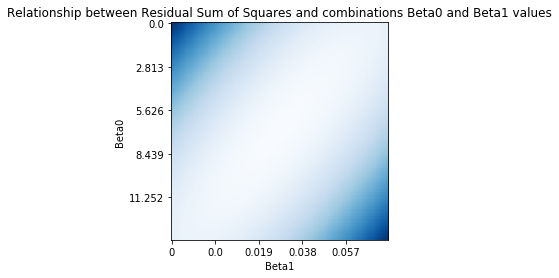

In [6]:
def rss(x,y,b1,b0):
    x = list(x)
    y = list(y)
    rss_ = 0
    for x_, y_ in zip(x,y):
        rss_ += (y_ - (b1*x_+ b0))**2
    #print(rss_)
    return rss_

b0_range = np.linspace(b0_*0, b0_*2, num=100)
b1_range = np.linspace(b1_*0, b1_*2, num=100)

rss_matrix = np.zeros((100,100))

for i,b0_val in enumerate(b0_range):
    for j,b1_val in enumerate(b1_range):
        rss_matrix[i,j] = rss(X, Y, b1_val, b0_val)

        

plt.imshow(rss_matrix, cmap = 'Blues', aspect = 'equal')
plt.title('Relationship between Residual Sum of Squares and combinations Beta0 and Beta1 values')
plt.xlabel('Beta1')
plt.ylabel('Beta0')
ax = plt.gca()
x_labels = plt.xticks()[1]
y_labels = plt.yticks()[1]

ax.set_xticklabels([0,0]+[round(x*(b1_*2/100), 3) for x in [0, 20, 40, 60, 80]])
ax.set_yticklabels([0.0]+[round(y*(b0_*2/100), 3) for y in [0, 20, 40, 60, 80]])
plt.show()

## Linear regression via sklearn

### sklearn organization
1. Estimators: the parent class that encompasses everything that learns from the data, including transformers that filter data from a dataset. *Note: this is different from the typical use of estimator in ML texts, which is as a parameter or density estimator*
2. Regressors: deal with continuous data by generating predictions based on the independant variable (which is also often called a regressor
3. Classifier: deal with discrete (categorical) data in much the same way
4. All sklearn resources are divided into 3 major areas -- supervised learning, unsupervised learning, model selection and evaluation -- and five minor areas. These areas can be examined in detail in the [sklearn user guide](https://scikit-learn.org/stable/user_guide.html).

### [sklearn LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
* At its core, sklearn uses the scipy.linalg.lstsq
* In addition, it centers the data and normalizes it
* Can handle sparse data, which is common when categorical data is vectorized so that all data is represented in binary

In [7]:
# The premade solution, which is commonly used in machine learning.

# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression

# Reshape so matches [n_samples, n_features] format that sklearn requires
X_ = X.reshape(-1, 1)
Y_ = Y.reshape(-1, 1)

reg = LinearRegression()
reg.fit(X_, Y_)

print('Same as what has been calculated previously\n_______\n')
print('b0', reg.intercept_[0])
print('b1', reg.coef_[0][0])

Same as what has been calculated previously
_______

b0 7.032593549127693
b1 0.047536640433019764


<class 'list'>
<class 'list'>
